In [50]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json

# Configuración
API_KEY = '56730a8114515a93bf2ec1a7448fcae0'
BASE_URL = 'https://api.themoviedb.org/3/'

In [51]:
# Función para calcular rentabilidad
def calcular_rentabilidad(budget, revenue):
    if budget == 0:
        return None
    return ((revenue - budget) / budget) * 100

In [52]:
# Obtener lista de películas
def obtener_peliculas():
    url = f"https://api.themoviedb.org/3/discover/movie?api_key={API_KEY}&language=en-US&sort_by=revenue.desc&page=1"
    response = requests.get(url)
    return response.json()["results"]

In [53]:
# Obtener detalles de una película
def obtener_detalles_pelicula(movie_id):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={API_KEY}&language=en-US"
    response = requests.get(url)
    return response.json()

# Obtener data y mostrarla
peliculas = obtener_peliculas()
data = []

for pelicula in peliculas[:10]:  # Limitar a las primeras 10 películas
    detalles = obtener_detalles_pelicula(pelicula["id"])
    budget = detalles.get("budget", 0)
    revenue = detalles.get("revenue", 0)
    data.append({
        "id": pelicula["id"],
        "title": detalles["title"],
        "budget": budget,
        "revenue": revenue,
        "release_date": detalles.get("release_date", "N/A")
    })

# Convertir a DataFrame para mejor visualización
df = pd.DataFrame(data)

# Filtrar películas con datos válidos de presupuesto y recaudación
df_validas = df[(df["budget"] > 0) & (df["revenue"] > 0)]

# Mostrar datos válidos
print("Películas con datos válidos:")
print(df_validas)


Películas con datos válidos:
        id                         title     budget     revenue release_date
0    19995                        Avatar  237000000  2923706026   2009-12-15
1   299534             Avengers: Endgame  356000000  2799439100   2019-04-24
2    76600      Avatar: The Way of Water  460000000  2320250281   2022-12-14
3      597                       Titanic  200000000  2264162353   1997-11-18
4   140607  Star Wars: The Force Awakens  245000000  2068223624   2015-12-15
5   299536        Avengers: Infinity War  300000000  2052415039   2018-04-25
6   634649       Spider-Man: No Way Home  200000000  1921847111   2021-12-15
7  1022789                  Inside Out 2  200000000  1698586747   2024-06-11
8   135397                Jurassic World  150000000  1671537444   2015-06-06
9   420818                 The Lion King  260000000  1663000000   2019-07-12


In [54]:
# Flujo principal: Obtener datos
peliculas = obtener_peliculas()
titulos = []
presupuestos = []
recaudaciones = []
rentabilidades = []

for pelicula in peliculas[:10]:  # Limitar a las primeras 10 películas para análisis
    detalles = obtener_detalles_pelicula(pelicula["id"])
    budget = detalles.get("budget", 0)
    revenue = detalles.get("revenue", 0)
    if budget > 0 and revenue > 0:  # Filtrar películas con datos válidos
        titulos.append(detalles["title"])
        presupuestos.append(budget / 1e6)  # Convertir a millones
        recaudaciones.append(revenue / 1e6)  # Convertir a millones
        rentabilidades.append(calcular_rentabilidad(budget, revenue))


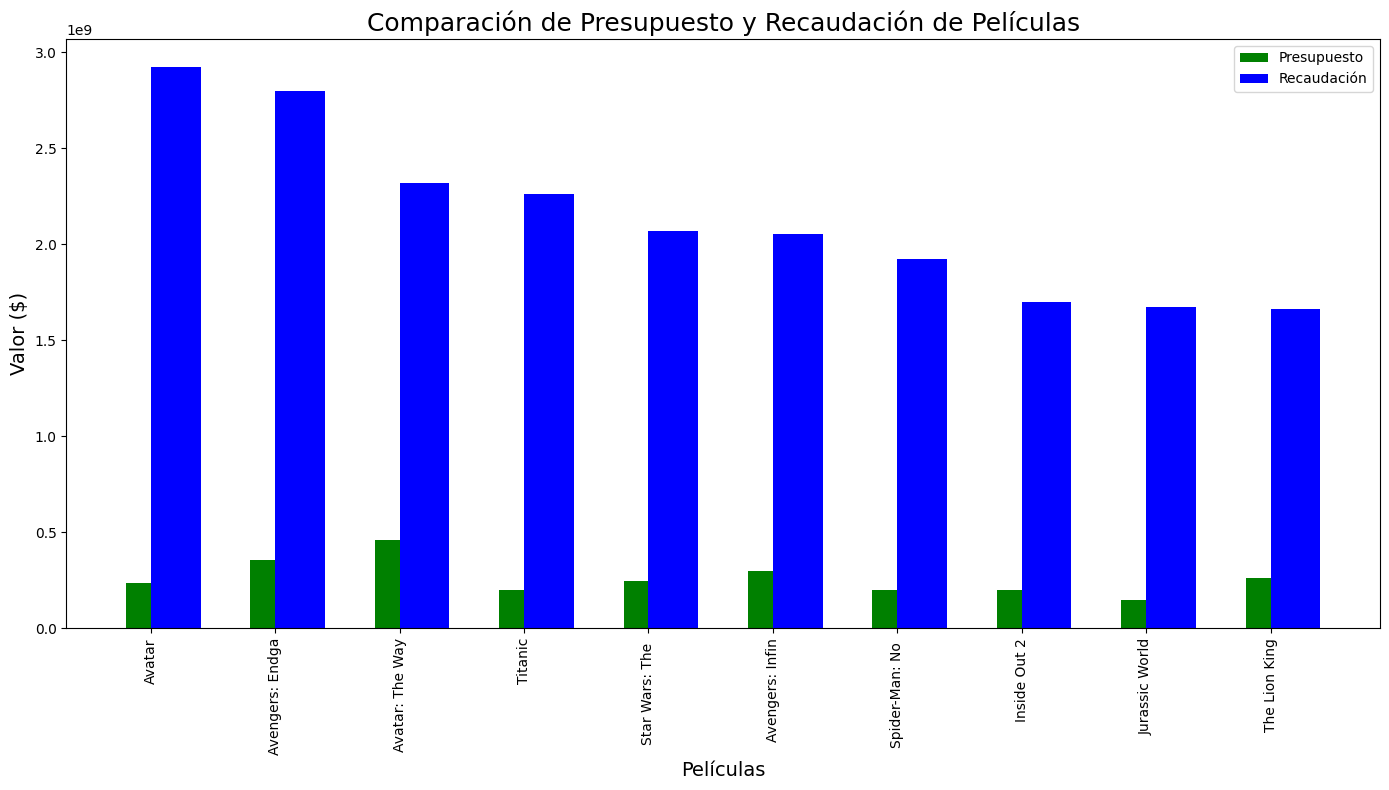

In [55]:
# Configurar la figura
plt.figure(figsize=(14, 8))

# Establecer posiciones para las barras
indices = range(len(df))

# Graficar las barras para presupuesto y recaudación
plt.bar(indices, df["budget"], width=0.4, label="Presupuesto", color='green', align='center')
plt.bar(indices, df["revenue"], width=0.4, label="Recaudación", color='blue', align='edge')

# Etiquetas y título
plt.title("Comparación de Presupuesto y Recaudación de Películas", fontsize=18)
plt.xlabel("Películas", fontsize=14)
plt.ylabel("Valor ($)", fontsize=14)

# Configurar las etiquetas de las películas
plt.xticks(indices, df["title"].str[:15], rotation=90, fontsize=10)

# Leyenda
plt.legend()

# Mostrar gráfico
plt.tight_layout()  # Ajusta el diseño para evitar que se corten etiquetas
plt.show()

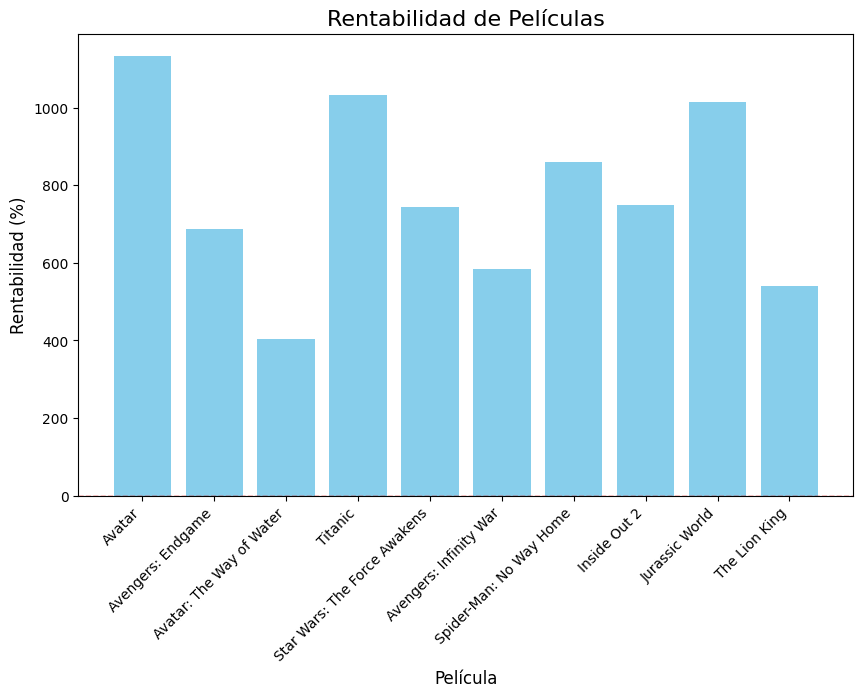

In [59]:
# Calcular la rentabilidad como porcentaje
df["rentabilidad"] = ((df["revenue"] - df["budget"]) / df["budget"]) * 100

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df["title"], df["rentabilidad"], color="skyblue")
plt.title("Rentabilidad de Películas", fontsize=16)
plt.xlabel("Película", fontsize=12)
plt.ylabel("Rentabilidad (%)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color="red", linestyle="--", linewidth=1)  # Línea de referencia en 0%
plt.show()


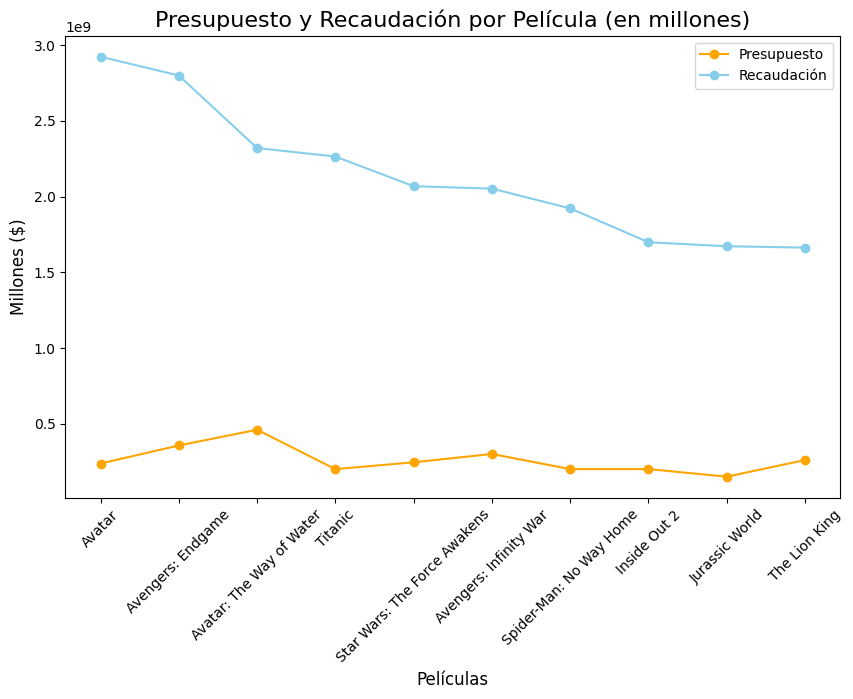

In [57]:
# Gráfico lineal de presupuesto vs. recaudación
plt.figure(figsize=(10, 6))
plt.plot(df["title"], df["budget"], marker="o", label="Presupuesto", color="orange")
plt.plot(df["title"], df["revenue"], marker="o", label="Recaudación", color="skyblue")
plt.title("Presupuesto y Recaudación por Película (en millones)", fontsize=16)
plt.xlabel("Películas", fontsize=12)
plt.ylabel("Millones ($)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.show()


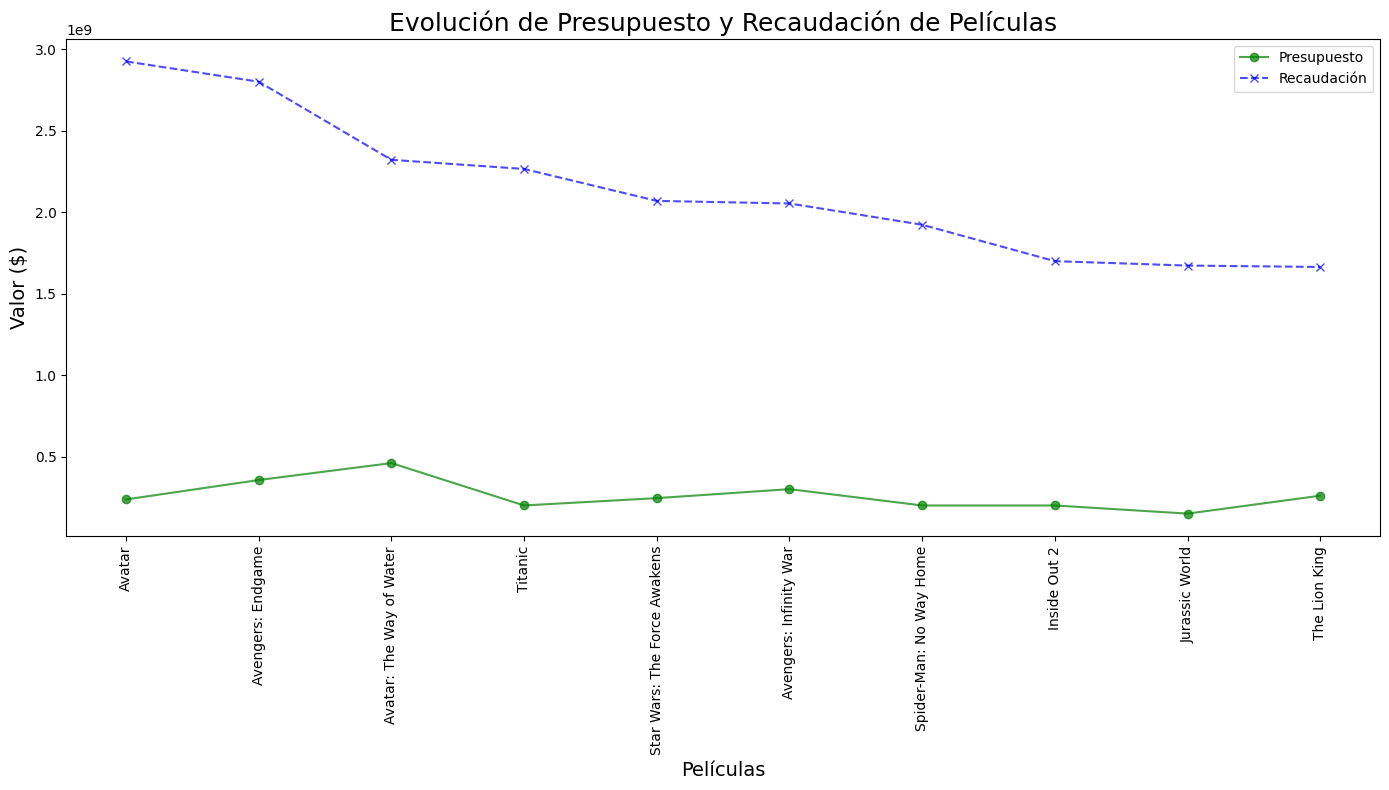

In [45]:
# Configurar la figura
plt.figure(figsize=(14, 8))

# Graficar las líneas para presupuesto y recaudación
plt.plot(df["title"], df["budget"], label="Presupuesto", color='green', marker='o', linestyle='-', alpha=0.7)
plt.plot(df["title"], df["revenue"], label="Recaudación", color='blue', marker='x', linestyle='--', alpha=0.7)

# Etiquetas y título
plt.title("Evolución de Presupuesto y Recaudación de Películas", fontsize=18)
plt.xlabel("Películas", fontsize=14)
plt.ylabel("Valor ($)", fontsize=14)

# Etiquetas de las películas
plt.xticks(rotation=90, fontsize=10)

# Leyenda
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [48]:
# Obtener lista de películas con detalles completos
def obtener_datos_completos():
    url_base = f"https://api.themoviedb.org/3/discover/movie?api_key={API_KEY}&language=en-US&sort_by=revenue.desc&page="
    peliculas_completas = []
    
    # Iterar por varias páginas
    for pagina in range(1, 6):  # Cambiar rango según la cantidad de datos que quieras (máx 500 páginas por endpoint)
        print(f"Obteniendo datos de la página {pagina}...")
        url = url_base + str(pagina)
        response = requests.get(url)
        peliculas = response.json().get("results", [])
        
        # Obtener detalles completos de cada película
        for pelicula in peliculas:
            detalles_url = f"https://api.themoviedb.org/3/movie/{pelicula['id']}?api_key={API_KEY}&language=en-US"
            detalles_response = requests.get(detalles_url)
            detalles = detalles_response.json()
            peliculas_completas.append(detalles)
            print(f"Película: {detalles.get('title', 'Sin título')}, Presupuesto: {detalles.get('budget', 'No disponible')}, Recaudación: {detalles.get('revenue', 'No disponible')}")
    
    return peliculas_completas

# Llamar a la función y mostrar los datos en consola
peliculas_crudas = obtener_datos_completos()


Obteniendo datos de la página 1...
Película: Avatar, Presupuesto: 237000000, Recaudación: 2923706026
Película: Avengers: Endgame, Presupuesto: 356000000, Recaudación: 2799439100
Película: Avatar: The Way of Water, Presupuesto: 460000000, Recaudación: 2320250281
Película: Titanic, Presupuesto: 200000000, Recaudación: 2264162353
Película: Star Wars: The Force Awakens, Presupuesto: 245000000, Recaudación: 2068223624
Película: Avengers: Infinity War, Presupuesto: 300000000, Recaudación: 2052415039
Película: Spider-Man: No Way Home, Presupuesto: 200000000, Recaudación: 1921847111
Película: Inside Out 2, Presupuesto: 200000000, Recaudación: 1698586747
Película: Jurassic World, Presupuesto: 150000000, Recaudación: 1671537444
Película: The Lion King, Presupuesto: 260000000, Recaudación: 1663000000
Película: The Avengers, Presupuesto: 220000000, Recaudación: 1518815515
Película: Furious 7, Presupuesto: 190000000, Recaudación: 1515400000
Película: Top Gun: Maverick, Presupuesto: 170000000, Recau